# Import libraries and data

A weather dataset of Cluj Napoca taken from the OpenWheather History API. It was scraped from the Open Weather Map using their Weather API. The data collected was from January 1st 2008 until May 2023 at an hourly rate.

Reference: https://huggingface.co/datasets/LaurentiuStancioiu/Cluj-Napoca-Weather-OpenWeather-data/blob/main/Long%20Term%20Time%20Series%20Forecasting%20for%20Cluj-Napoca%20Weather%20Prediction.pdf


In [1]:
import numpy as np
from datasets import load_dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
# import pygwalker

In [2]:
ds = load_dataset("LaurentiuStancioiu/Cluj-Napoca-Weather-OpenWeather-data")
df = ds["train"].to_pandas()

View Cluj-Napoca city on a map.

In [123]:
import folium
import webbrowser

Cluj_map = folium.Map(location = [df['lat'][0],df['lon'][0]], zoom_start=12)
Cluj_map.save('map.html')
webbrowser.open_new_tab('map.html')

True

View dataset sample records:

In [3]:
df.sample(20)

,dt,dt_iso,timezone,city_name,lat,lon,temp,visibility,dew_point,feels_like,...,wind_gust,rain_1h,rain_3h,snow_1h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
14605,1249855200,2009-08-09 22:00:00 +0000 UTC,10800,Universitatea Babeș-Bolyai din Cluj-Napoca,46.767141,23.592139,15.69,10000.0,13.36,15.56,...,NaN,NaN,NaN,NaN,NaN,0,800,Clear,sky is clear,01n
133270,1661655600,2022-08-28 03:00:00 +0000 UTC,10800,Universitatea Babeș-Bolyai din Cluj-Napoca,46.767141,23.592139,13.70,10000.0,12.75,13.58,...,NaN,NaN,NaN,NaN,NaN,0,800,Clear,sky is clear,01n
67849,1433750400,2015-06-08 08:00:00 +0000 UTC,10800,Universitatea Babeș-Bolyai din Cluj-Napoca,46.767141,23.592139,23.80,10000.0,12.76,23.54,...,NaN,NaN,NaN,NaN,NaN,0,800,Clear,sky is clear,01d
102264,1552971600,2019-03-19 05:00:00 +0000 UTC,7200,Universitatea Babeș-Bolyai din Cluj-Napoca,46.767141,23.592139,5.77,9999.0,2.77,3.67,...,NaN,0.24,NaN,NaN,NaN,40,500,Rain,light rain,10d
17270,1259060400,2009-11-24 11:00:00 +0000 UTC,7200,Universitatea Babeș-Bolyai din Cluj-Napoca,46.767141,23.592139,7.66,10000.0,6.76,7.66,...,NaN,NaN,NaN,NaN,NaN,75,701,Mist,mist,50d
10248,1234789200,2009-02-16 13:00:00 +0000 UTC,7200,Universitatea Babeș-Bolyai din Cluj-Napoca,46.767141,23.592139,-2.72,10000.0,-9.86,-6.77,...,6.0,NaN,NaN,NaN,NaN,20,801,Clouds,few clouds,02d
129364,1647752400,2022-03-20 05:00:00 +0000 UTC,7200,Universitatea Babeș-Bolyai din Cluj-Napoca,46.767141,23.592139,-5.79,10000.0,-7.53,-5.79,...,NaN,NaN,NaN,NaN,NaN,0,800,Clear,sky is clear,01d
104298,1560186000,2019-06-10 17:00:00 +0000 UTC,10800,Universitatea Babeș-Bolyai din Cluj-Napoca,46.767141,23.592139,22.79,9999.0,15.87,22.82,...,NaN,NaN,NaN,NaN,NaN,20,801,Clouds,few clouds,02d
99822,1545026400,2018-12-17 06:00:00 +0000 UTC,7200,Universitatea Babeș-Bolyai din Cluj-Napoca,46.767141,23.592139,-1.09,5000.0,-2.09,-1.09,...,NaN,NaN,NaN,NaN,NaN,100,600,Snow,light snow,13n
85004,1493546400,2017-04-30 10:00:00 +0000 UTC,10800,Universitatea Babeș-Bolyai din Cluj-Napoca,46.767141,23.592139,11.41,9999.0,4.40,10.23,...,NaN,NaN,NaN,NaN,NaN,75,803,Clouds,broken clouds,04d


# Initial Understanding

Shape of the dataframe, showing that we are having more than one hundred records with 28 attributes as shown on the sample above.

In [4]:
df.shape

(139394, 28)

Vew all column names and column types (i.e. pandas type of each series).

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139394 entries, 0 to 139393
Data columns (total 28 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   dt                   139394 non-null  int64  
 1   dt_iso               139394 non-null  object 
 2   timezone             139394 non-null  int64  
 3   city_name            139394 non-null  object 
 4   lat                  139394 non-null  float64
 5   lon                  139394 non-null  float64
 6   temp                 139394 non-null  float64
 7   visibility           137498 non-null  float64
 8   dew_point            139391 non-null  float64
 9   feels_like           139394 non-null  float64
 10  temp_min             139394 non-null  float64
 11  temp_max             139394 non-null  float64
 12  pressure             139394 non-null  int64  
 13  sea_level            0 non-null       float64
 14  grnd_level           0 non-null       float64
 15  humidity         

One good thing about this dataset is that all the column names follow the best practices for analysis. Therefore, renaming the columns is not necessary.

In [6]:
df.columns

Index(['dt', 'dt_iso', 'timezone', 'city_name', 'lat', 'lon', 'temp',
       'visibility', 'dew_point', 'feels_like', 'temp_min', 'temp_max',
       'pressure', 'sea_level', 'grnd_level', 'humidity', 'wind_speed',
       'wind_deg', 'wind_gust', 'rain_1h', 'rain_3h', 'snow_1h', 'snow_3h',
       'clouds_all', 'weather_id', 'weather_main', 'weather_description',
       'weather_icon'],
      dtype='object')

In [7]:
df.dtypes

dt                       int64
dt_iso                  object
timezone                 int64
city_name               object
lat                    float64
lon                    float64
temp                   float64
visibility             float64
dew_point              float64
feels_like             float64
temp_min               float64
temp_max               float64
pressure                 int64
sea_level              float64
grnd_level             float64
humidity                 int64
wind_speed             float64
wind_deg                 int64
wind_gust              float64
rain_1h                float64
rain_3h                float64
snow_1h                float64
snow_3h                float64
clouds_all               int64
weather_id               int64
weather_main            object
weather_description     object
weather_icon            object
dtype: object

View general statistics figure of numeric data.

In [8]:
df.describe()

,dt,timezone,lat,lon,temp,visibility,dew_point,feels_like,temp_min,temp_max,...,humidity,wind_speed,wind_deg,wind_gust,rain_1h,rain_3h,snow_1h,snow_3h,clouds_all,weather_id
count,1.393940e+05,139394.000000,139394.000000,1.393940e+05,139394.000000,137498.000000,139391.000000,139394.000000,139394.000000,139394.000000,...,139394.000000,139394.000000,139394.000000,10915.000000,19027.000000,1847.000000,4572.000000,821.000000,139394.000000,139394.000000
mean,1.440551e+09,9251.649282,46.767141,2.359214e+01,9.618191,8693.875169,5.084661,8.529267,8.327400,12.116846,...,75.657396,2.390518,154.977940,5.031590,0.605345,1.859643,0.361105,0.908526,38.215605,728.715253
std,1.396620e+08,1782.328653,0.000000,3.552726e-15,47.385004,2743.282608,7.568612,47.556514,47.396329,9.727896,...,19.817223,26.828828,117.502033,3.494126,0.876458,3.033603,0.300892,1.108691,38.417129,121.070155
min,1.199146e+09,7200.000000,46.767141,2.359214e+01,-9998.770000,49.000000,-24.390000,-10005.770000,-9998.960000,-275.450000,...,0.000000,0.000000,0.000000,0.000000,0.100000,0.100000,0.100000,0.100000,0.000000,200.000000
25%,1.319538e+09,7200.000000,46.767141,2.359214e+01,2.240000,9999.000000,-0.450000,0.690000,0.840000,4.700000,...,62.000000,1.030000,60.000000,3.000000,0.180000,0.200000,0.160000,0.200000,0.000000,701.000000
50%,1.440347e+09,10800.000000,46.767141,2.359214e+01,9.700000,10000.000000,5.150000,8.800000,8.450000,12.000000,...,81.000000,2.000000,130.000000,5.000000,0.330000,0.800000,0.260000,0.500000,20.000000,800.000000
75%,1.561060e+09,10800.000000,46.767141,2.359214e+01,16.910000,10000.000000,11.350000,16.700000,15.750000,19.400000,...,93.000000,3.100000,270.000000,7.000000,0.700000,2.000000,0.450000,1.000000,75.000000,801.000000
max,1.682982e+09,10800.000000,46.767141,2.359214e+01,37.610000,10000.000000,25.190000,37.740000,37.000000,42.700000,...,100.000000,9999.000000,360.000000,24.200000,18.000000,27.000000,2.280000,9.000000,100.000000,804.000000


Add description for each attribute.

!warning PLEASE DOUBLE CHECK.

In [9]:
attribute_dict = {}
attribute_dict['dt'] = 'Time of data calculation, unix, UTC'
attribute_dict['dt_iso'] = 'Date and time in UTC format'
attribute_dict['timezone'] = 'Shift in seconds from UTC'
attribute_dict['city_name'] = 'City name'
attribute_dict['lat'] = 'Geographical coordinates of the location (latitude)'
attribute_dict['lon'] = 'Geographical coordinates of the location (longitude)'
attribute_dict['temp'] = 'Temperature'
attribute_dict['visibility'] = 'Average visibility, metres. The maximum distance at which an object or light can be clearly seen by a human observer under current atmospheric conditions. Lower visibility values may trigger warnings for drivers or pilots.'
attribute_dict['dew_point'] = 'Atmospheric temperature (varying according to pressure and humidity) below which water droplets begin to condense and dew can form'
attribute_dict['feels_like'] = 'This temperature parameter accounts for the human perception of weather'
attribute_dict['temp_min'] = 'Minimum temperature at the moment (optional)'
attribute_dict['temp_max'] = 'Maximum temperature at the moment (optional)'
attribute_dict['pressure'] = 'N/A'
attribute_dict['sea_level'] = 'N/A'
attribute_dict['grnd_level'] = 'N/A'
attribute_dict['humidity'] = 'Humidity, %'
attribute_dict['wind_speed'] = 'N/A'
attribute_dict['wind_deg'] = 'Wind direction, degrees (meteorological)'
attribute_dict['wind_gust'] = 'N/A'
attribute_dict['rain_1h'] = 'Rain volume for the last hour, mm'
attribute_dict['rain_3h'] = 'Rain volume for the last 3 hours, mm'
attribute_dict['snow_1h'] = 'Snow volume for the last hour, mm (in liquid state)'
attribute_dict['snow_3h'] = 'Snow volume for the last 3 hours, mm (in liquid state)'
attribute_dict['clouds_all'] = 'Cloudiness, %'
attribute_dict['weather_id'] = 'Weather condition id'
attribute_dict['weather_main'] = 'Group of weather parameters (Rain, Snow, Extreme etc.)'
attribute_dict['weather_description'] = 'Weather condition within the group'
attribute_dict['weather_icon'] = 'Weather icon id'

attribute_dict

{'dt': 'Time of data calculation, unix, UTC',
 'dt_iso': 'Date and time in UTC format',
 'timezone': 'Shift in seconds from UTC',
 'city_name': 'City name',
 'lat': 'Geographical coordinates of the location (latitude)',
 'lon': 'Geographical coordinates of the location (longitude)',
 'temp': 'Temperature',
 'visibility': 'Average visibility, metres. The maximum distance at which an object or light can be clearly seen by a human observer under current atmospheric conditions. Lower visibility values may trigger warnings for drivers or pilots.',
 'dew_point': 'Atmospheric temperature (varying according to pressure and humidity) below which water droplets begin to condense and dew can form',
 'feels_like': 'This temperature parameter accounts for the human perception of weather',
 'temp_min': 'Minimum temperature at the moment (optional)',
 'temp_max': 'Maximum temperature at the moment (optional)',
 'pressure': 'N/A',
 'sea_level': 'N/A',
 'grnd_level': 'N/A',
 'humidity': 'Humidity, %',


Take the first record as an example, here's a data explanation [AI-generated]:

"
This record describes **cold, humid, and snowy winter weather** during the **early hours of January 1, 2008**, in **Cluj-Napoca, Romania**.

* The **temperature** was around **-9.5°C**, with the **"feels like"** temperature matching it, suggesting calm wind conditions with minimal wind chill.
* The **humidity** was high at **92%**, and the **dew point** was close to the actual temperature, indicating **saturation**—ideal for **snow or frost**.
* The **weather condition** was classified as **"light snow"**, supported by 100% **cloud cover** and reduced **visibility** (4 km). This suggests snowfall was occurring but **not heavy**.
* **No recent measurable precipitation** (rain or snow) was recorded in the last 1 or 3 hours, which could imply **light, intermittent snowflakes** without accumulation.
* **Wind was light** (1.0 m/s) from the **east-southeast (110°)**, with **no gusts** reported, contributing to the stable "feels like" temperature.
* **Pressure** was **high (1024 hPa)**, indicating a likely presence of a **cold, stable air mass**, often associated with winter conditions.
* **No data** was available for **sea level and ground-level pressure**, but this is not uncommon for historical or location-specific datasets.

**Summary:**

This was a **quiet, wintry night** with **light snow**, **cold temperatures**, **high humidity**, **calm winds**, and **no significant precipitation** accumulation—typical of **a stable, frosty weather pattern** in a continental climate zone.
"

In [10]:
print(df.iloc[0])

dt                                                     1199145600
dt_iso                              2008-01-01 00:00:00 +0000 UTC
timezone                                                     7200
city_name              Universitatea Babeș-Bolyai din Cluj-Napoca
lat                                                     46.767141
lon                                                     23.592139
temp                                                        -9.46
visibility                                                 4000.0
dew_point                                                   -10.4
feels_like                                                  -9.46
temp_min                                                   -11.37
temp_max                                                    -7.64
pressure                                                     1024
sea_level                                                     NaN
grnd_level                                                    NaN
humidity  

# Data cleaning

We will now introduce a cleaned_df dataframe, that store the results after each cleaning step. The copy() function specify that this is a new and separate dataframe that is not just reference to the orignial one.


In [11]:
cleaned_df = df.copy()

### Missing data

Check missing value.

In [12]:
df.isna().sum()

dt                          0
dt_iso                      0
timezone                    0
city_name                   0
lat                         0
lon                         0
temp                        0
visibility               1896
dew_point                   3
feels_like                  0
temp_min                    0
temp_max                    0
pressure                    0
sea_level              139394
grnd_level             139394
humidity                    0
wind_speed                  0
wind_deg                    0
wind_gust              128479
rain_1h                120367
rain_3h                137547
snow_1h                134822
snow_3h                138573
clouds_all                  0
weather_id                  0
weather_main                0
weather_description         0
weather_icon                0
dtype: int64

In [13]:
bool_series = pd.isna(df["visibility"])
df[bool_series]

,dt,dt_iso,timezone,city_name,lat,lon,temp,visibility,dew_point,feels_like,...,wind_gust,rain_1h,rain_3h,snow_1h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
463,1200722400,2008-01-19 06:00:00 +0000 UTC,7200,Universitatea Babeș-Bolyai din Cluj-Napoca,46.767141,23.592139,0.77,NaN,0.35,-1.56,...,NaN,NaN,NaN,NaN,NaN,100,741,Fog,fog,50n
464,1200726000,2008-01-19 07:00:00 +0000 UTC,7200,Universitatea Babeș-Bolyai din Cluj-Napoca,46.767141,23.592139,0.51,NaN,0.09,0.51,...,NaN,NaN,NaN,NaN,NaN,100,741,Fog,fog,50d
465,1200729600,2008-01-19 08:00:00 +0000 UTC,7200,Universitatea Babeș-Bolyai din Cluj-Napoca,46.767141,23.592139,1.48,NaN,1.20,1.48,...,NaN,NaN,NaN,NaN,NaN,100,741,Fog,fog,50d
466,1200733200,2008-01-19 09:00:00 +0000 UTC,7200,Universitatea Babeș-Bolyai din Cluj-Napoca,46.767141,23.592139,2.46,NaN,2.32,2.46,...,NaN,NaN,NaN,NaN,NaN,100,741,Fog,fog,50d
467,1200736800,2008-01-19 10:00:00 +0000 UTC,7200,Universitatea Babeș-Bolyai din Cluj-Napoca,46.767141,23.592139,3.53,NaN,3.39,3.53,...,NaN,NaN,NaN,NaN,NaN,100,741,Fog,fog,50d
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135005,1667718000,2022-11-06 07:00:00 +0000 UTC,7200,Universitatea Babeș-Bolyai din Cluj-Napoca,46.767141,23.592139,7.68,NaN,6.93,6.48,...,NaN,NaN,NaN,NaN,NaN,96,804,Clouds,overcast clouds,04d
135170,1668276000,2022-11-12 18:00:00 +0000 UTC,7200,Universitatea Babeș-Bolyai din Cluj-Napoca,46.767141,23.592139,5.33,NaN,3.98,4.30,...,NaN,NaN,NaN,NaN,NaN,7,800,Clear,sky is clear,01n
138339,1679324400,2023-03-20 15:00:00 +0000 UTC,7200,Universitatea Babeș-Bolyai din Cluj-Napoca,46.767141,23.592139,-9998.77,NaN,NaN,-9998.77,...,NaN,NaN,NaN,NaN,NaN,0,800,Clear,sky is clear,01d
138604,1680271200,2023-03-31 14:00:00 +0000 UTC,10800,Universitatea Babeș-Bolyai din Cluj-Napoca,46.767141,23.592139,-9998.77,NaN,NaN,-10005.77,...,NaN,NaN,NaN,NaN,NaN,40,802,Clouds,scattered clouds,03d


The missing data might occurs due to several reasons, including but not limited to:
- Many stations lack sensors for visibility, sea_level, grnd_level, or wind_gust.
- Fields like wind_gust, rain_1h, snow_3h, and visibility are only reported if there's a significant event.
- Missing rain_*, snow_*, and sometimes wind_gust usually means "none occurred", not bad data.
- Some older or low-cost stations may not report all measurements (e.g., visibility in remote locations).
- Data may be excluded due to dropped signals or formatting in real-time APIs.

We will not take actions on the Missing data until fulfilling missing data is required for analysis.

### Duplicated data

There is no exact duplicate records.

In [14]:
df.loc[df.duplicated()]

,dt,dt_iso,timezone,city_name,lat,lon,temp,visibility,dew_point,feels_like,...,wind_gust,rain_1h,rain_3h,snow_1h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon


However, within specific time and location subsets, there are 4,994 duplicate instances — meaning multiple records exist for the same location at the exact same timestamp. This can occur due to data being collected from multiple sources or sensors, variations between forecasted and observed data, or delays and overlaps in data reporting and aggregation.

It is not possible to conclude which record might be the accurate data. Hence, we will keep this for further analysis at this moment.

In [15]:
df.loc[df.duplicated(subset=['dt','dt_iso', 'timezone', 'city_name', 'lat', 'lon'])].sort_values(by=['dt'])

,dt,dt_iso,timezone,city_name,lat,lon,temp,visibility,dew_point,feels_like,...,wind_gust,rain_1h,rain_3h,snow_1h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
18,1199206800,2008-01-01 17:00:00 +0000 UTC,7200,Universitatea Babeș-Bolyai din Cluj-Napoca,46.767141,23.592139,-5.21,4000.0,-5.93,-5.21,...,NaN,NaN,NaN,0.15,NaN,100,600,Snow,light snow,13n
20,1199210400,2008-01-01 18:00:00 +0000 UTC,7200,Universitatea Babeș-Bolyai din Cluj-Napoca,46.767141,23.592139,-4.69,4000.0,-5.41,-4.69,...,NaN,NaN,NaN,0.23,NaN,100,600,Snow,light snow,13n
22,1199214000,2008-01-01 19:00:00 +0000 UTC,7200,Universitatea Babeș-Bolyai din Cluj-Napoca,46.767141,23.592139,-4.42,4000.0,-5.14,-4.42,...,NaN,NaN,NaN,0.30,NaN,100,600,Snow,light snow,13n
24,1199217600,2008-01-01 20:00:00 +0000 UTC,7200,Universitatea Babeș-Bolyai din Cluj-Napoca,46.767141,23.592139,-4.15,2000.0,-4.75,-4.15,...,NaN,NaN,NaN,0.30,NaN,100,600,Snow,light snow,13n
26,1199221200,2008-01-01 21:00:00 +0000 UTC,7200,Universitatea Babeș-Bolyai din Cluj-Napoca,46.767141,23.592139,-3.87,2000.0,-4.47,-3.87,...,NaN,NaN,NaN,NaN,1.0,100,600,Snow,light snow,13n
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138774,1680768000,2023-04-06 08:00:00 +0000 UTC,10800,Universitatea Babeș-Bolyai din Cluj-Napoca,46.767141,23.592139,-0.11,2000.0,-1.93,-5.13,...,NaN,NaN,NaN,0.65,NaN,100,701,Mist,mist,50d
138776,1680771600,2023-04-06 09:00:00 +0000 UTC,10800,Universitatea Babeș-Bolyai din Cluj-Napoca,46.767141,23.592139,0.34,5000.0,-2.39,-4.27,...,NaN,NaN,NaN,0.60,NaN,100,701,Mist,mist,50d
138778,1680775200,2023-04-06 10:00:00 +0000 UTC,10800,Universitatea Babeș-Bolyai din Cluj-Napoca,46.767141,23.592139,0.59,5000.0,-1.30,-4.61,...,NaN,NaN,NaN,0.59,NaN,100,701,Mist,mist,50d
138782,1680786000,2023-04-06 13:00:00 +0000 UTC,10800,Universitatea Babeș-Bolyai din Cluj-Napoca,46.767141,23.592139,0.68,5000.0,-2.09,-4.49,...,NaN,NaN,NaN,0.30,NaN,100,701,Mist,mist,50d


In [ ]:
count = df['dt'].value_counts()
count.sort_values(ascending=False)

In [16]:
cleaned_df.query('dt==1199664000') # why do we have 2 different weather conclusions for the exact same time of the year?

,dt,dt_iso,timezone,city_name,lat,lon,temp,visibility,dew_point,feels_like,...,wind_gust,rain_1h,rain_3h,snow_1h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
159,1199664000,2008-01-07 00:00:00 +0000 UTC,7200,Universitatea Babeș-Bolyai din Cluj-Napoca,46.767141,23.592139,-0.06,10000.0,-1.33,-0.06,...,NaN,NaN,NaN,0.41,NaN,100,500,Rain,light rain,10n
160,1199664000,2008-01-07 00:00:00 +0000 UTC,7200,Universitatea Babeș-Bolyai din Cluj-Napoca,46.767141,23.592139,-0.06,10000.0,-1.33,-0.06,...,NaN,NaN,NaN,0.41,NaN,100,600,Snow,light snow,13n


Once decided to drop some records, we will reset the dataframe index.

In [17]:
# cleaned_df.reset_index(drop=True)

## Feature Understanding

In [44]:
df.columns

Index(['dt', 'dt_iso', 'timezone', 'city_name', 'lat', 'lon', 'temp',
       'visibility', 'dew_point', 'feels_like', 'temp_min', 'temp_max',
       'pressure', 'sea_level', 'grnd_level', 'humidity', 'wind_speed',
       'wind_deg', 'wind_gust', 'rain_1h', 'rain_3h', 'snow_1h', 'snow_3h',
       'clouds_all', 'weather_id', 'weather_main', 'weather_description',
       'weather_icon', 'z_score'],
      dtype='object')

dt
1200790800    3
1200794400    3
1417323600    3
1276754400    3
1200805200    3
             ..
1199185200    1
1199188800    1
1199192400    1
1199196000    1
1199199600    1
Name: count, Length: 134400, dtype: int64

### Date

The date time is currently in an 'object' type. We will convert this into date time format for easier manipulations.

In [86]:
# remove the 'utc' text at the end of the string
cleaned_df['dt_iso']  = df['dt_iso'].str.replace(" UTC", "", regex=False)
# convert the updated string to date time type
cleaned_df['dt_iso'] = pd.to_datetime(cleaned_df['dt_iso'], utc=True)
# validate updated type
cleaned_df['dt_iso'].dtype

datetime64[ns, UTC]

In [96]:
cleaned_df.sort_values(by='dt_iso', axis=0, ascending=True)

,dt,dt_iso,timezone,city_name,lat,lon,temp,visibility,dew_point,feels_like,...,wind_gust,rain_1h,rain_3h,snow_1h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
0,1199145600,2008-01-01 00:00:00+00:00,7200,Universitatea Babeș-Bolyai din Cluj-Napoca,46.767141,23.592139,-9.46,4000.0,-10.40,-9.46,...,NaN,NaN,NaN,NaN,NaN,100,600,Snow,light snow,13n
1,1199149200,2008-01-01 01:00:00+00:00,7200,Universitatea Babeș-Bolyai din Cluj-Napoca,46.767141,23.592139,-9.39,4000.0,-10.33,-9.39,...,NaN,NaN,NaN,NaN,NaN,100,600,Snow,light snow,13n
2,1199152800,2008-01-01 02:00:00+00:00,7200,Universitatea Babeș-Bolyai din Cluj-Napoca,46.767141,23.592139,-9.39,4000.0,-10.33,-9.39,...,NaN,NaN,NaN,NaN,NaN,100,600,Snow,light snow,13n
3,1199156400,2008-01-01 03:00:00+00:00,7200,Universitatea Babeș-Bolyai din Cluj-Napoca,46.767141,23.592139,-9.55,4000.0,-10.49,-9.55,...,NaN,NaN,NaN,NaN,0.1,100,804,Clouds,overcast clouds,04n
4,1199160000,2008-01-01 04:00:00+00:00,7200,Universitatea Babeș-Bolyai din Cluj-Napoca,46.767141,23.592139,-9.55,4000.0,-10.37,-9.55,...,NaN,NaN,NaN,NaN,NaN,100,701,Mist,mist,50n
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139389,1682967600,2023-05-01 19:00:00+00:00,10800,Universitatea Babeș-Bolyai din Cluj-Napoca,46.767141,23.592139,12.61,10000.0,4.57,11.44,...,NaN,NaN,NaN,NaN,NaN,0,800,Clear,sky is clear,01n
139390,1682971200,2023-05-01 20:00:00+00:00,10800,Universitatea Babeș-Bolyai din Cluj-Napoca,46.767141,23.592139,10.61,10000.0,5.58,9.58,...,NaN,NaN,NaN,NaN,NaN,0,800,Clear,sky is clear,01n
139391,1682974800,2023-05-01 21:00:00+00:00,10800,Universitatea Babeș-Bolyai din Cluj-Napoca,46.767141,23.592139,10.07,10000.0,6.04,9.12,...,NaN,NaN,NaN,NaN,NaN,0,800,Clear,sky is clear,01n
139392,1682978400,2023-05-01 22:00:00+00:00,10800,Universitatea Babeș-Bolyai din Cluj-Napoca,46.767141,23.592139,9.80,10000.0,6.70,9.80,...,NaN,NaN,NaN,NaN,NaN,0,800,Clear,sky is clear,01n


<Axes: xlabel='dt', ylabel='Count'>

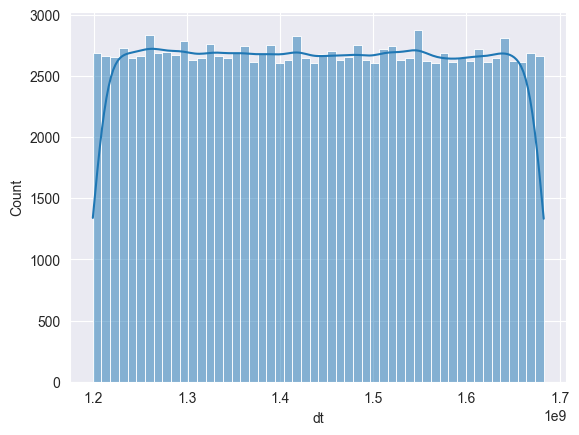

In [19]:
sns.histplot(df['dt'], kde=True)

### City info

Since the dataset is specifically collected for Cluj-Napoca, some attribute seems redundant.


In [20]:
for i in df.columns[2:6]:
    print(f'Unique values of {i} are {pd.unique(df[i])}')


Unique values of timezone are [ 7200 10800]
Unique values of city_name are ['Universitatea Babeș-Bolyai din Cluj-Napoca']
Unique values of lat are [46.767141]
Unique values of lon are [23.592139]


Except for the timezones, since Cluj-Napoca shifts time in Summer (Daylight saving time). We will, however, remove the others columns that are not necessary.

In [21]:
cleaned_df = df.drop(df.columns[2:6], axis=1).copy()
cleaned_df

,dt,dt_iso,temp,visibility,dew_point,feels_like,temp_min,temp_max,pressure,sea_level,...,wind_gust,rain_1h,rain_3h,snow_1h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
0,1199145600,2008-01-01 00:00:00 +0000 UTC,-9.46,4000.0,-10.40,-9.46,-11.37,-7.64,1024,NaN,...,NaN,NaN,NaN,NaN,NaN,100,600,Snow,light snow,13n
1,1199149200,2008-01-01 01:00:00 +0000 UTC,-9.39,4000.0,-10.33,-9.39,-11.50,-7.39,1024,NaN,...,NaN,NaN,NaN,NaN,NaN,100,600,Snow,light snow,13n
2,1199152800,2008-01-01 02:00:00 +0000 UTC,-9.39,4000.0,-10.33,-9.39,-11.68,-7.35,1023,NaN,...,NaN,NaN,NaN,NaN,NaN,100,600,Snow,light snow,13n
3,1199156400,2008-01-01 03:00:00 +0000 UTC,-9.55,4000.0,-10.49,-9.55,-11.74,-7.60,1023,NaN,...,NaN,NaN,NaN,NaN,0.1,100,804,Clouds,overcast clouds,04n
4,1199160000,2008-01-01 04:00:00 +0000 UTC,-9.55,4000.0,-10.37,-9.55,-11.48,-7.85,1023,NaN,...,NaN,NaN,NaN,NaN,NaN,100,701,Mist,mist,50n
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139389,1682967600,2023-05-01 19:00:00 +0000 UTC,12.61,10000.0,4.57,11.44,12.04,13.42,1019,NaN,...,NaN,NaN,NaN,NaN,NaN,0,800,Clear,sky is clear,01n
139390,1682971200,2023-05-01 20:00:00 +0000 UTC,10.61,10000.0,5.58,9.58,9.85,11.83,1019,NaN,...,NaN,NaN,NaN,NaN,NaN,0,800,Clear,sky is clear,01n
139391,1682974800,2023-05-01 21:00:00 +0000 UTC,10.07,10000.0,6.04,9.12,8.59,11.83,1019,NaN,...,NaN,NaN,NaN,NaN,NaN,0,800,Clear,sky is clear,01n
139392,1682978400,2023-05-01 22:00:00 +0000 UTC,9.80,10000.0,6.70,9.80,7.48,11.83,1020,NaN,...,NaN,NaN,NaN,NaN,NaN,0,800,Clear,sky is clear,01n


### Temp and Feels-like

Noticing unusual graphs for Temperature's visualization, we may easily detect outliers as a common sense.

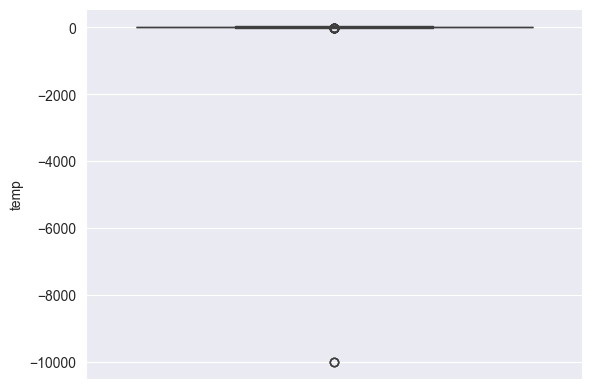

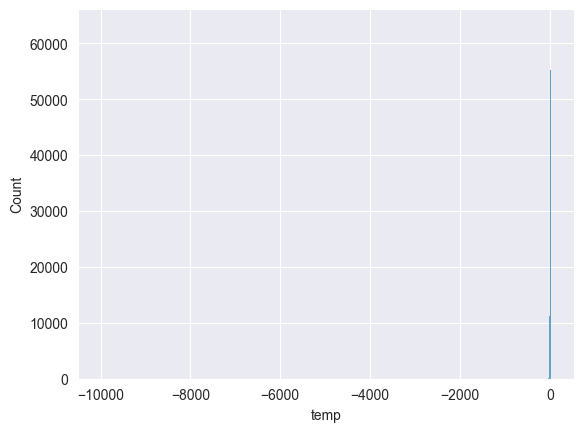

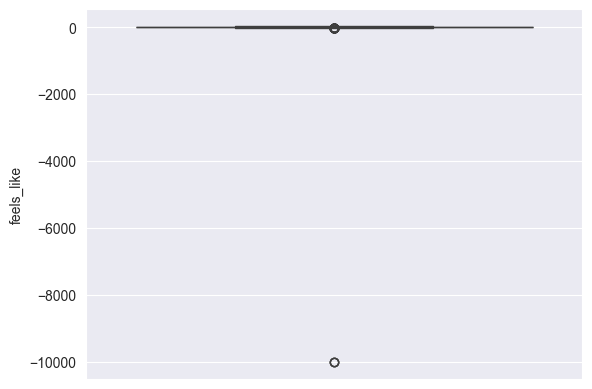

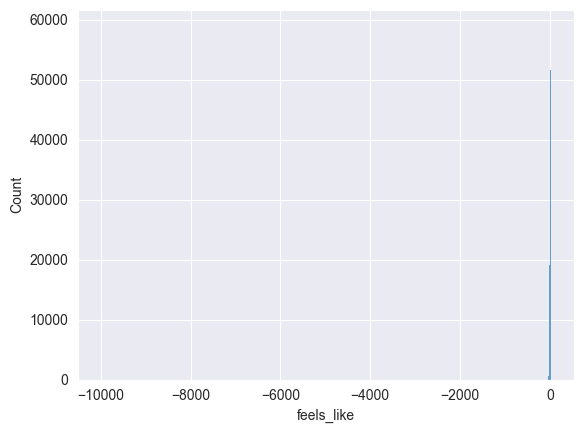

In [22]:
sns.boxplot(df['temp'])
plt.show()
sns.histplot(df['temp'])
plt.show()

sns.boxplot(df['feels_like'])
plt.show()

sns.histplot(df['feels_like'])
plt.show()


In [23]:
df['temp'].min(), df['temp'].max(), df['feels_like'].min(), df['feels_like'].max()

(np.float64(-9998.77),
 np.float64(37.61),
 np.float64(-10005.77),
 np.float64(37.74))

In [24]:
# physically unrealistic cutoff
outliers = df[(df['temp'] < -100) | (df['feels_like'] < -100)]
outliers

,dt,dt_iso,timezone,city_name,lat,lon,temp,visibility,dew_point,feels_like,...,wind_gust,rain_1h,rain_3h,snow_1h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
138339,1679324400,2023-03-20 15:00:00 +0000 UTC,7200,Universitatea Babeș-Bolyai din Cluj-Napoca,46.767141,23.592139,-9998.77,NaN,NaN,-9998.77,...,NaN,NaN,NaN,NaN,NaN,0,800,Clear,sky is clear,01d
138604,1680271200,2023-03-31 14:00:00 +0000 UTC,10800,Universitatea Babeș-Bolyai din Cluj-Napoca,46.767141,23.592139,-9998.77,NaN,NaN,-10005.77,...,NaN,NaN,NaN,NaN,NaN,40,802,Clouds,scattered clouds,03d
138804,1680861600,2023-04-07 10:00:00 +0000 UTC,10800,Universitatea Babeș-Bolyai din Cluj-Napoca,46.767141,23.592139,-9998.77,NaN,NaN,-9998.77,...,NaN,NaN,NaN,NaN,NaN,100,804,Clouds,overcast clouds,04d


The 3 records above showing error data in a specific coordinate. Their temperature and feels_like show obvious inappropriate value. Since there are only 3 records over more than 130 thousand of data point, we will go ahead to remove them as the simplest approach.

In [25]:
cleaned_df = df.drop(outliers.index).copy()
cleaned_df

,dt,dt_iso,timezone,city_name,lat,lon,temp,visibility,dew_point,feels_like,...,wind_gust,rain_1h,rain_3h,snow_1h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
0,1199145600,2008-01-01 00:00:00 +0000 UTC,7200,Universitatea Babeș-Bolyai din Cluj-Napoca,46.767141,23.592139,-9.46,4000.0,-10.40,-9.46,...,NaN,NaN,NaN,NaN,NaN,100,600,Snow,light snow,13n
1,1199149200,2008-01-01 01:00:00 +0000 UTC,7200,Universitatea Babeș-Bolyai din Cluj-Napoca,46.767141,23.592139,-9.39,4000.0,-10.33,-9.39,...,NaN,NaN,NaN,NaN,NaN,100,600,Snow,light snow,13n
2,1199152800,2008-01-01 02:00:00 +0000 UTC,7200,Universitatea Babeș-Bolyai din Cluj-Napoca,46.767141,23.592139,-9.39,4000.0,-10.33,-9.39,...,NaN,NaN,NaN,NaN,NaN,100,600,Snow,light snow,13n
3,1199156400,2008-01-01 03:00:00 +0000 UTC,7200,Universitatea Babeș-Bolyai din Cluj-Napoca,46.767141,23.592139,-9.55,4000.0,-10.49,-9.55,...,NaN,NaN,NaN,NaN,0.1,100,804,Clouds,overcast clouds,04n
4,1199160000,2008-01-01 04:00:00 +0000 UTC,7200,Universitatea Babeș-Bolyai din Cluj-Napoca,46.767141,23.592139,-9.55,4000.0,-10.37,-9.55,...,NaN,NaN,NaN,NaN,NaN,100,701,Mist,mist,50n
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139389,1682967600,2023-05-01 19:00:00 +0000 UTC,10800,Universitatea Babeș-Bolyai din Cluj-Napoca,46.767141,23.592139,12.61,10000.0,4.57,11.44,...,NaN,NaN,NaN,NaN,NaN,0,800,Clear,sky is clear,01n
139390,1682971200,2023-05-01 20:00:00 +0000 UTC,10800,Universitatea Babeș-Bolyai din Cluj-Napoca,46.767141,23.592139,10.61,10000.0,5.58,9.58,...,NaN,NaN,NaN,NaN,NaN,0,800,Clear,sky is clear,01n
139391,1682974800,2023-05-01 21:00:00 +0000 UTC,10800,Universitatea Babeș-Bolyai din Cluj-Napoca,46.767141,23.592139,10.07,10000.0,6.04,9.12,...,NaN,NaN,NaN,NaN,NaN,0,800,Clear,sky is clear,01n
139392,1682978400,2023-05-01 22:00:00 +0000 UTC,10800,Universitatea Babeș-Bolyai din Cluj-Napoca,46.767141,23.592139,9.80,10000.0,6.70,9.80,...,NaN,NaN,NaN,NaN,NaN,0,800,Clear,sky is clear,01n


### Visibility

At first glance, the visibility data appears reasonable, ranging from a minimum of 49 meters to a maximum of 10,000 meters.  the latter typically indicating perfectly clear conditions with no significant obstructions.


In [26]:
df['visibility'].describe()

count    137498.000000
mean       8693.875169
std        2743.282608
min          49.000000
25%        9999.000000
50%       10000.000000
75%       10000.000000
max       10000.000000
Name: visibility, dtype: float64

<Axes: xlabel='visibility', ylabel='Count'>

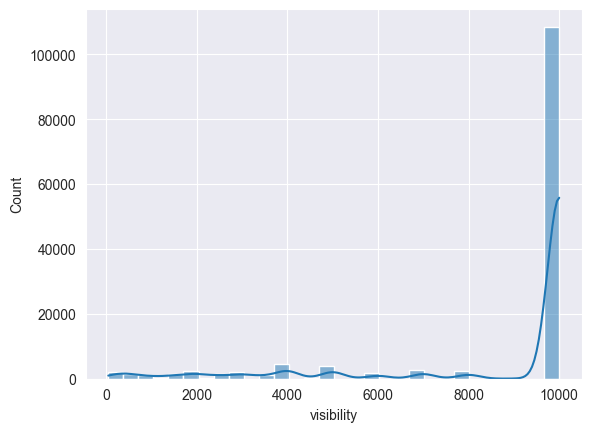

In [27]:
sns.histplot(df['visibility'], bins=30, kde=True)

### Dew point

In [59]:
attribute_dict['dew_point']

'Atmospheric temperature (varying according to pressure and humidity) below which water droplets begin to condense and dew can form'

There were 3 records with missing dew_point values, which also corresponded to temperature outliers. These records were identified as bad data and have been removed in cleaned_df.

In [61]:
df[df['dew_point'].isna()]

,dt,dt_iso,timezone,city_name,lat,lon,temp,visibility,dew_point,feels_like,...,rain_1h,rain_3h,snow_1h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon,z_score
138339,1679324400,2023-03-20 15:00:00 +0000 UTC,7200,Universitatea Babeș-Bolyai din Cluj-Napoca,46.767141,23.592139,-9998.77,NaN,NaN,-9998.77,...,NaN,NaN,NaN,NaN,0,800,Clear,sky is clear,01d,-0.042884
138604,1680271200,2023-03-31 14:00:00 +0000 UTC,10800,Universitatea Babeș-Bolyai din Cluj-Napoca,46.767141,23.592139,-9998.77,NaN,NaN,-10005.77,...,NaN,NaN,NaN,NaN,40,802,Clouds,scattered clouds,03d,-0.010456
138804,1680861600,2023-04-07 10:00:00 +0000 UTC,10800,Universitatea Babeș-Bolyai din Cluj-Napoca,46.767141,23.592139,-9998.77,NaN,NaN,-9998.77,...,NaN,NaN,NaN,NaN,100,804,Clouds,overcast clouds,04d,372.608356


In [62]:
cleaned_df[cleaned_df['dew_point'].isna()]

,dt,dt_iso,timezone,city_name,lat,lon,temp,visibility,dew_point,feels_like,...,wind_gust,rain_1h,rain_3h,snow_1h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon


### Pressure

Looking at the describe() results of Pressure attribute, there must be outlier(s) that impact the visualisations. Scientifically, the pressure can never be lower than zero, we will simply remove the only record having this error.

In [29]:
outliers = df[df['pressure']< 0]
outliers

,dt,dt_iso,timezone,city_name,lat,lon,temp,visibility,dew_point,feels_like,...,wind_gust,rain_1h,rain_3h,snow_1h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
138339,1679324400,2023-03-20 15:00:00 +0000 UTC,7200,Universitatea Babeș-Bolyai din Cluj-Napoca,46.767141,23.592139,-9998.77,NaN,NaN,-9998.77,...,NaN,NaN,NaN,NaN,NaN,0,800,Clear,sky is clear,01d


<Axes: xlabel='pressure', ylabel='Count'>

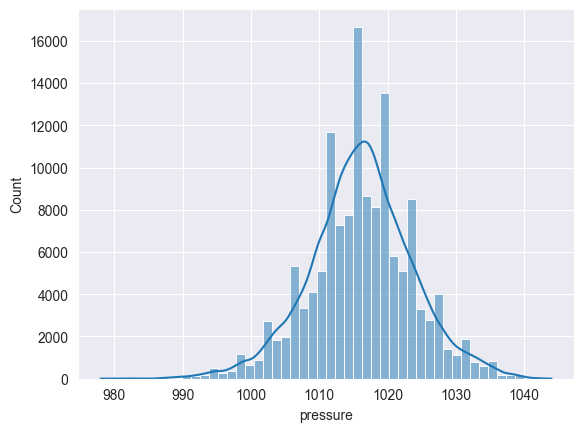

In [30]:
sns.histplot(df[df['pressure'] > 0]['pressure'], bins=50, kde=True)


In [31]:
try:
    cleaned_df = cleaned_df.drop(outliers.index, axis = 0).copy()
except:
    print('Already dropped')
cleaned_df

Already dropped


,dt,dt_iso,timezone,city_name,lat,lon,temp,visibility,dew_point,feels_like,...,wind_gust,rain_1h,rain_3h,snow_1h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
0,1199145600,2008-01-01 00:00:00 +0000 UTC,7200,Universitatea Babeș-Bolyai din Cluj-Napoca,46.767141,23.592139,-9.46,4000.0,-10.40,-9.46,...,NaN,NaN,NaN,NaN,NaN,100,600,Snow,light snow,13n
1,1199149200,2008-01-01 01:00:00 +0000 UTC,7200,Universitatea Babeș-Bolyai din Cluj-Napoca,46.767141,23.592139,-9.39,4000.0,-10.33,-9.39,...,NaN,NaN,NaN,NaN,NaN,100,600,Snow,light snow,13n
2,1199152800,2008-01-01 02:00:00 +0000 UTC,7200,Universitatea Babeș-Bolyai din Cluj-Napoca,46.767141,23.592139,-9.39,4000.0,-10.33,-9.39,...,NaN,NaN,NaN,NaN,NaN,100,600,Snow,light snow,13n
3,1199156400,2008-01-01 03:00:00 +0000 UTC,7200,Universitatea Babeș-Bolyai din Cluj-Napoca,46.767141,23.592139,-9.55,4000.0,-10.49,-9.55,...,NaN,NaN,NaN,NaN,0.1,100,804,Clouds,overcast clouds,04n
4,1199160000,2008-01-01 04:00:00 +0000 UTC,7200,Universitatea Babeș-Bolyai din Cluj-Napoca,46.767141,23.592139,-9.55,4000.0,-10.37,-9.55,...,NaN,NaN,NaN,NaN,NaN,100,701,Mist,mist,50n
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139389,1682967600,2023-05-01 19:00:00 +0000 UTC,10800,Universitatea Babeș-Bolyai din Cluj-Napoca,46.767141,23.592139,12.61,10000.0,4.57,11.44,...,NaN,NaN,NaN,NaN,NaN,0,800,Clear,sky is clear,01n
139390,1682971200,2023-05-01 20:00:00 +0000 UTC,10800,Universitatea Babeș-Bolyai din Cluj-Napoca,46.767141,23.592139,10.61,10000.0,5.58,9.58,...,NaN,NaN,NaN,NaN,NaN,0,800,Clear,sky is clear,01n
139391,1682974800,2023-05-01 21:00:00 +0000 UTC,10800,Universitatea Babeș-Bolyai din Cluj-Napoca,46.767141,23.592139,10.07,10000.0,6.04,9.12,...,NaN,NaN,NaN,NaN,NaN,0,800,Clear,sky is clear,01n
139392,1682978400,2023-05-01 22:00:00 +0000 UTC,10800,Universitatea Babeș-Bolyai din Cluj-Napoca,46.767141,23.592139,9.80,10000.0,6.70,9.80,...,NaN,NaN,NaN,NaN,NaN,0,800,Clear,sky is clear,01n


### Sea Level and Grnd Level

There are two redundant attributes that having no records at all. They are also not being introduced in the attribute  description. Therefore, we will ignore and drop these 2 columns.

In [66]:
df['sea_level'].notna().sum(), df['grnd_level'].notna().sum()

(np.int64(0), np.int64(0))

In [32]:
cleaned_df = cleaned_df.drop(df[['sea_level', 'grnd_level']], axis = 1)
cleaned_df

,dt,dt_iso,timezone,city_name,lat,lon,temp,visibility,dew_point,feels_like,...,wind_gust,rain_1h,rain_3h,snow_1h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
0,1199145600,2008-01-01 00:00:00 +0000 UTC,7200,Universitatea Babeș-Bolyai din Cluj-Napoca,46.767141,23.592139,-9.46,4000.0,-10.40,-9.46,...,NaN,NaN,NaN,NaN,NaN,100,600,Snow,light snow,13n
1,1199149200,2008-01-01 01:00:00 +0000 UTC,7200,Universitatea Babeș-Bolyai din Cluj-Napoca,46.767141,23.592139,-9.39,4000.0,-10.33,-9.39,...,NaN,NaN,NaN,NaN,NaN,100,600,Snow,light snow,13n
2,1199152800,2008-01-01 02:00:00 +0000 UTC,7200,Universitatea Babeș-Bolyai din Cluj-Napoca,46.767141,23.592139,-9.39,4000.0,-10.33,-9.39,...,NaN,NaN,NaN,NaN,NaN,100,600,Snow,light snow,13n
3,1199156400,2008-01-01 03:00:00 +0000 UTC,7200,Universitatea Babeș-Bolyai din Cluj-Napoca,46.767141,23.592139,-9.55,4000.0,-10.49,-9.55,...,NaN,NaN,NaN,NaN,0.1,100,804,Clouds,overcast clouds,04n
4,1199160000,2008-01-01 04:00:00 +0000 UTC,7200,Universitatea Babeș-Bolyai din Cluj-Napoca,46.767141,23.592139,-9.55,4000.0,-10.37,-9.55,...,NaN,NaN,NaN,NaN,NaN,100,701,Mist,mist,50n
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139389,1682967600,2023-05-01 19:00:00 +0000 UTC,10800,Universitatea Babeș-Bolyai din Cluj-Napoca,46.767141,23.592139,12.61,10000.0,4.57,11.44,...,NaN,NaN,NaN,NaN,NaN,0,800,Clear,sky is clear,01n
139390,1682971200,2023-05-01 20:00:00 +0000 UTC,10800,Universitatea Babeș-Bolyai din Cluj-Napoca,46.767141,23.592139,10.61,10000.0,5.58,9.58,...,NaN,NaN,NaN,NaN,NaN,0,800,Clear,sky is clear,01n
139391,1682974800,2023-05-01 21:00:00 +0000 UTC,10800,Universitatea Babeș-Bolyai din Cluj-Napoca,46.767141,23.592139,10.07,10000.0,6.04,9.12,...,NaN,NaN,NaN,NaN,NaN,0,800,Clear,sky is clear,01n
139392,1682978400,2023-05-01 22:00:00 +0000 UTC,10800,Universitatea Babeș-Bolyai din Cluj-Napoca,46.767141,23.592139,9.80,10000.0,6.70,9.80,...,NaN,NaN,NaN,NaN,NaN,0,800,Clear,sky is clear,01n


### Humidity

The histogram of humidity appears normal, with no suspicious values. Therefore, we will retain the data as is for now.

<Axes: xlabel='humidity', ylabel='Count'>

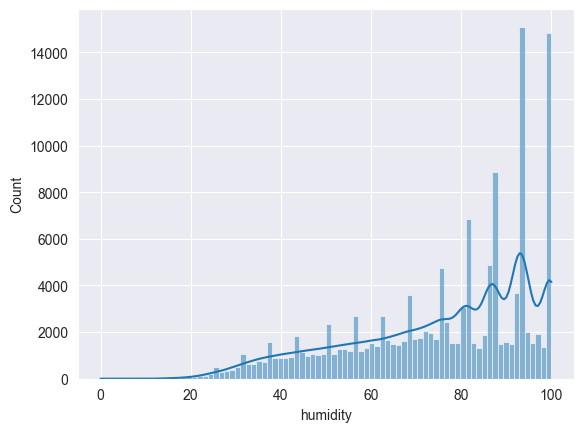

In [67]:
sns.histplot(df['humidity'], kde=True)

### Wind

In [34]:
# Calculate z-scores for a column
df['z_score'] = zscore(df['wind_speed'])

# Detect outliers where |z| > 3
outliers = df[np.abs(df['z_score']) > 3]
outliers

,dt,dt_iso,timezone,city_name,lat,lon,temp,visibility,dew_point,feels_like,...,rain_1h,rain_3h,snow_1h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon,z_score
138804,1680861600,2023-04-07 10:00:00 +0000 UTC,10800,Universitatea Babeș-Bolyai din Cluj-Napoca,46.767141,23.592139,-9998.77,NaN,NaN,-9998.77,...,NaN,NaN,NaN,NaN,100,804,Clouds,overcast clouds,04d,372.608356


In [35]:
try:
    cleaned_df.drop(outliers.index, axis = 1).copy()
except:
    print('Already cleared. ')
cleaned_df

Already cleared. 


,dt,dt_iso,timezone,city_name,lat,lon,temp,visibility,dew_point,feels_like,...,wind_gust,rain_1h,rain_3h,snow_1h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
0,1199145600,2008-01-01 00:00:00 +0000 UTC,7200,Universitatea Babeș-Bolyai din Cluj-Napoca,46.767141,23.592139,-9.46,4000.0,-10.40,-9.46,...,NaN,NaN,NaN,NaN,NaN,100,600,Snow,light snow,13n
1,1199149200,2008-01-01 01:00:00 +0000 UTC,7200,Universitatea Babeș-Bolyai din Cluj-Napoca,46.767141,23.592139,-9.39,4000.0,-10.33,-9.39,...,NaN,NaN,NaN,NaN,NaN,100,600,Snow,light snow,13n
2,1199152800,2008-01-01 02:00:00 +0000 UTC,7200,Universitatea Babeș-Bolyai din Cluj-Napoca,46.767141,23.592139,-9.39,4000.0,-10.33,-9.39,...,NaN,NaN,NaN,NaN,NaN,100,600,Snow,light snow,13n
3,1199156400,2008-01-01 03:00:00 +0000 UTC,7200,Universitatea Babeș-Bolyai din Cluj-Napoca,46.767141,23.592139,-9.55,4000.0,-10.49,-9.55,...,NaN,NaN,NaN,NaN,0.1,100,804,Clouds,overcast clouds,04n
4,1199160000,2008-01-01 04:00:00 +0000 UTC,7200,Universitatea Babeș-Bolyai din Cluj-Napoca,46.767141,23.592139,-9.55,4000.0,-10.37,-9.55,...,NaN,NaN,NaN,NaN,NaN,100,701,Mist,mist,50n
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139389,1682967600,2023-05-01 19:00:00 +0000 UTC,10800,Universitatea Babeș-Bolyai din Cluj-Napoca,46.767141,23.592139,12.61,10000.0,4.57,11.44,...,NaN,NaN,NaN,NaN,NaN,0,800,Clear,sky is clear,01n
139390,1682971200,2023-05-01 20:00:00 +0000 UTC,10800,Universitatea Babeș-Bolyai din Cluj-Napoca,46.767141,23.592139,10.61,10000.0,5.58,9.58,...,NaN,NaN,NaN,NaN,NaN,0,800,Clear,sky is clear,01n
139391,1682974800,2023-05-01 21:00:00 +0000 UTC,10800,Universitatea Babeș-Bolyai din Cluj-Napoca,46.767141,23.592139,10.07,10000.0,6.04,9.12,...,NaN,NaN,NaN,NaN,NaN,0,800,Clear,sky is clear,01n
139392,1682978400,2023-05-01 22:00:00 +0000 UTC,10800,Universitatea Babeș-Bolyai din Cluj-Napoca,46.767141,23.592139,9.80,10000.0,6.70,9.80,...,NaN,NaN,NaN,NaN,NaN,0,800,Clear,sky is clear,01n


### Rain and Snow

For the raining and snowing amount, there are a few significantly high records compared to the quartile description. However, these can be valid outliers and we may preserve them for further investigation.

In [36]:
rain = df[(df['rain_1h'] > 15) | (df['rain_3h'] > 15)]
rain

,dt,dt_iso,timezone,city_name,lat,lon,temp,visibility,dew_point,feels_like,...,rain_1h,rain_3h,snow_1h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon,z_score
4886,1216123200,2008-07-15 12:00:00 +0000 UTC,10800,Universitatea Babeș-Bolyai din Cluj-Napoca,46.767141,23.592139,18.41,10000.0,15.28,18.45,...,NaN,20.0,NaN,NaN,75,502,Rain,heavy intensity rain,10d,0.097264
5074,1216782000,2008-07-23 03:00:00 +0000 UTC,10800,Universitatea Babeș-Bolyai din Cluj-Napoca,46.767141,23.592139,14.18,10000.0,13.87,14.21,...,NaN,21.0,NaN,NaN,100,701,Mist,mist,50d,-0.014556
5075,1216782000,2008-07-23 03:00:00 +0000 UTC,10800,Universitatea Babeș-Bolyai din Cluj-Napoca,46.767141,23.592139,14.18,10000.0,13.87,14.21,...,NaN,21.0,NaN,NaN,100,502,Rain,heavy intensity rain,10d,-0.014556
5077,1216789200,2008-07-23 05:00:00 +0000 UTC,10800,Universitatea Babeș-Bolyai din Cluj-Napoca,46.767141,23.592139,14.12,4000.0,13.81,14.15,...,16.0,NaN,NaN,NaN,100,502,Rain,heavy intensity rain,10d,-0.014556
5078,1216792800,2008-07-23 06:00:00 +0000 UTC,10800,Universitatea Babeș-Bolyai din Cluj-Napoca,46.767141,23.592139,14.31,4000.0,14.00,14.36,...,NaN,26.0,NaN,NaN,100,502,Rain,heavy intensity rain,10d,-0.014556
5092,1216843200,2008-07-23 20:00:00 +0000 UTC,10800,Universitatea Babeș-Bolyai din Cluj-Napoca,46.767141,23.592139,15.26,10000.0,14.79,15.37,...,18.0,NaN,NaN,NaN,100,520,Rain,light intensity shower rain,09n,-0.051829
5093,1216846800,2008-07-23 21:00:00 +0000 UTC,10800,Universitatea Babeș-Bolyai din Cluj-Napoca,46.767141,23.592139,15.15,10000.0,14.68,15.25,...,NaN,27.0,NaN,NaN,100,502,Rain,heavy intensity rain,10n,-0.051829
13421,1245769200,2009-06-23 15:00:00 +0000 UTC,10800,Universitatea Babeș-Bolyai din Cluj-Napoca,46.767141,23.592139,17.16,10000.0,16.52,17.44,...,NaN,24.0,NaN,NaN,40,201,Thunderstorm,thunderstorm with rain,11d,-0.051829
13422,1245769200,2009-06-23 15:00:00 +0000 UTC,10800,Universitatea Babeș-Bolyai din Cluj-Napoca,46.767141,23.592139,17.16,10000.0,16.52,17.44,...,NaN,24.0,NaN,NaN,40,502,Rain,heavy intensity rain,10d,-0.051829
22529,1276873200,2010-06-18 15:00:00 +0000 UTC,10800,Universitatea Babeș-Bolyai din Cluj-Napoca,46.767141,23.592139,20.98,10000.0,20.98,21.74,...,NaN,20.0,NaN,NaN,75,201,Thunderstorm,thunderstorm with rain,11d,-0.014556


In [37]:
snow = df[(df['snow_1h'] > 2) | (df['snow_3h'] > 5)]
snow

,dt,dt_iso,timezone,city_name,lat,lon,temp,visibility,dew_point,feels_like,...,rain_1h,rain_3h,snow_1h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon,z_score
8481,1228676400,2008-12-07 19:00:00 +0000 UTC,7200,Universitatea Babeș-Bolyai din Cluj-Napoca,46.767141,23.592139,1.78,6000.0,1.78,-3.19,...,NaN,NaN,2.22,NaN,100,601,Snow,snow,13n,0.134538
8482,1228680000,2008-12-07 20:00:00 +0000 UTC,7200,Universitatea Babeș-Bolyai din Cluj-Napoca,46.767141,23.592139,1.76,6000.0,1.76,-2.72,...,NaN,NaN,2.06,NaN,100,601,Snow,snow,13n,0.097264
8486,1228694400,2008-12-08 00:00:00 +0000 UTC,7200,Universitatea Babeș-Bolyai din Cluj-Napoca,46.767141,23.592139,1.53,8000.0,1.53,-1.66,...,NaN,NaN,NaN,9.0,100,601,Snow,snow,13n,0.022718
10148,1234450800,2009-02-12 15:00:00 +0000 UTC,7200,Universitatea Babeș-Bolyai din Cluj-Napoca,46.767141,23.592139,0.37,1800.0,0.23,0.37,...,NaN,NaN,NaN,6.0,100,701,Mist,mist,50d,-0.051829
10149,1234450800,2009-02-12 15:00:00 +0000 UTC,7200,Universitatea Babeș-Bolyai din Cluj-Napoca,46.767141,23.592139,0.37,1800.0,0.23,0.37,...,NaN,NaN,NaN,6.0,100,601,Snow,snow,13d,-0.051829
10154,1234461600,2009-02-12 18:00:00 +0000 UTC,7200,Universitatea Babeș-Bolyai din Cluj-Napoca,46.767141,23.592139,-0.28,1500.0,-0.28,-0.28,...,NaN,NaN,NaN,6.0,100,701,Mist,mist,50n,-0.051829
10155,1234461600,2009-02-12 18:00:00 +0000 UTC,7200,Universitatea Babeș-Bolyai din Cluj-Napoca,46.767141,23.592139,-0.28,1500.0,-0.28,-0.28,...,NaN,NaN,NaN,6.0,100,601,Snow,snow,13n,-0.051829
11038,1237345200,2009-03-18 03:00:00 +0000 UTC,7200,Universitatea Babeș-Bolyai din Cluj-Napoca,46.767141,23.592139,1.37,4000.0,0.66,1.37,...,NaN,NaN,NaN,7.0,100,601,Snow,snow,13n,-0.089103
19418,1266044400,2010-02-13 07:00:00 +0000 UTC,7200,Universitatea Babeș-Bolyai din Cluj-Napoca,46.767141,23.592139,0.72,1000.0,0.72,-1.62,...,NaN,NaN,2.28,NaN,100,701,Mist,mist,50d,-0.014556
19419,1266044400,2010-02-13 07:00:00 +0000 UTC,7200,Universitatea Babeș-Bolyai din Cluj-Napoca,46.767141,23.592139,0.72,1000.0,0.72,-1.62,...,NaN,NaN,2.28,NaN,100,612,Snow,light shower sleet,13d,-0.014556


### Clouds all

Cloudliness is in percentage and no value exceed the normal range.

<Axes: ylabel='clouds_all'>

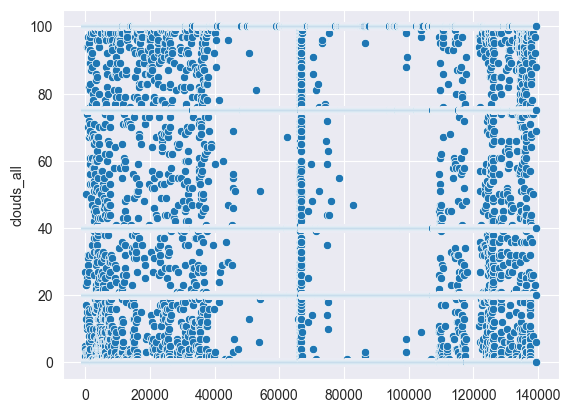

In [38]:
sns.scatterplot(df['clouds_all'])

### Weather ID

There are 34 unique IDs for weather icons.

In [39]:
pd.unique(df['weather_id'])


array([600, 804, 701, 601, 803, 741, 802, 801, 800, 500, 520, 612, 620,
       501, 300, 502, 201, 211, 521, 711, 621, 611, 202, 301, 721, 522,
       221, 200, 771, 761, 622, 321, 602, 615])

<Axes: xlabel='weather_id', ylabel='Count'>

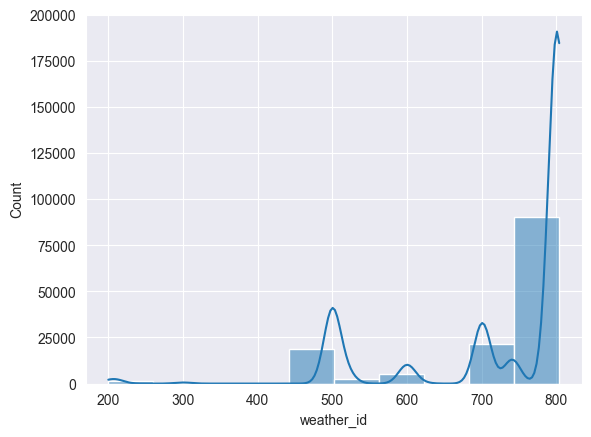

In [40]:
sns.histplot(df['weather_id'], bins=10, kde=True)

### Others

In [41]:
cleaned_df.describe()

,dt,timezone,lat,lon,temp,visibility,dew_point,feels_like,temp_min,temp_max,...,humidity,wind_speed,wind_deg,wind_gust,rain_1h,rain_3h,snow_1h,snow_3h,clouds_all,weather_id
count,1.393910e+05,139391.000000,1.393910e+05,139391.000000,139391.000000,137498.000000,139391.000000,139391.000000,139391.000000,139391.000000,...,139391.000000,139391.000000,139391.000000,10915.000000,19027.000000,1847.000000,4572.000000,821.000000,139391.000000,139391.000000
mean,1.440546e+09,9251.641785,4.676714e+01,23.592139,9.833593,8693.875169,5.084661,8.744696,8.542779,12.123035,...,75.659024,2.318812,154.977402,5.031590,0.605345,1.859643,0.361105,0.908526,38.215423,728.713676
std,1.396591e+08,1782.329712,7.105453e-15,0.000000,9.460105,2743.282608,7.568612,10.258701,9.541555,9.636087,...,19.814327,1.694446,117.502117,3.494126,0.876458,3.033603,0.300892,1.108691,38.417050,121.070980
min,1.199146e+09,7200.000000,4.676714e+01,23.592139,-23.020000,49.000000,-24.390000,-29.270000,-26.180000,-21.250000,...,7.000000,0.000000,0.000000,0.000000,0.100000,0.100000,0.100000,0.100000,0.000000,200.000000
25%,1.319535e+09,7200.000000,4.676714e+01,23.592139,2.240000,9999.000000,-0.450000,0.690000,0.840000,4.700000,...,62.000000,1.030000,60.000000,3.000000,0.180000,0.200000,0.160000,0.200000,0.000000,701.000000
50%,1.440342e+09,10800.000000,4.676714e+01,23.592139,9.700000,10000.000000,5.150000,8.800000,8.450000,12.000000,...,81.000000,2.000000,130.000000,5.000000,0.330000,0.800000,0.260000,0.500000,20.000000,800.000000
75%,1.561052e+09,10800.000000,4.676714e+01,23.592139,16.910000,10000.000000,11.350000,16.700000,15.750000,19.400000,...,93.000000,3.100000,270.000000,7.000000,0.700000,2.000000,0.450000,1.000000,75.000000,801.000000
max,1.682982e+09,10800.000000,4.676714e+01,23.592139,37.610000,10000.000000,25.190000,37.740000,37.000000,42.700000,...,100.000000,18.000000,360.000000,24.200000,18.000000,27.000000,2.280000,9.000000,100.000000,804.000000


In [42]:
cleaned_df.shape

(139391, 26)

## Summary

- No missing value was dropped.
- Not yet found out the duplication reasons.
- Converted date time format.
- Sorted the dataframe by date time in ascending order.
- Dropped redundant location info.
- Dropped records with Temp, Feels-like, Dew_point, Pressure, Wind,  outliers
- Dropped Sea level and Grnd Level columns


## Feature Relationships

In [69]:
cleaned_df.columns

Index(['dt', 'dt_iso', 'timezone', 'city_name', 'lat', 'lon', 'temp',
       'visibility', 'dew_point', 'feels_like', 'temp_min', 'temp_max',
       'pressure', 'humidity', 'wind_speed', 'wind_deg', 'wind_gust',
       'rain_1h', 'rain_3h', 'snow_1h', 'snow_3h', 'clouds_all', 'weather_id',
       'weather_main', 'weather_description', 'weather_icon'],
      dtype='object')

### Scatter plot

Below is an example of temperature values over time, which clearly follow a seasonal pattern, reflecting typical weather changes throughout the year.


<Axes: xlabel='dt_iso', ylabel='temp'>

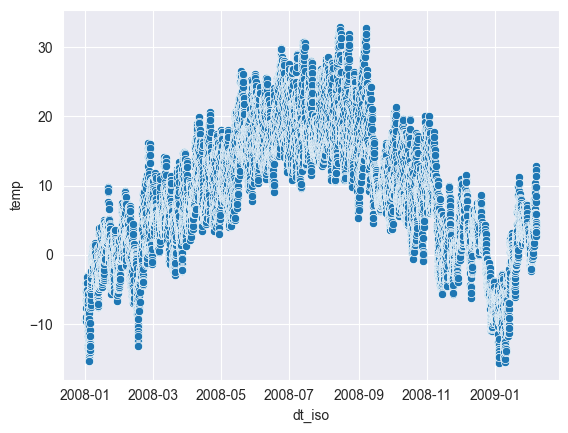

In [115]:
sns.scatterplot(x = cleaned_df['dt_iso'].head(10000), y = cleaned_df['temp'].head(10000))

### Correlation

To gaining insights into how different factors may influence each other, we generate a the correlation heatmap using Seaborn’s built-in function.

<Axes: >

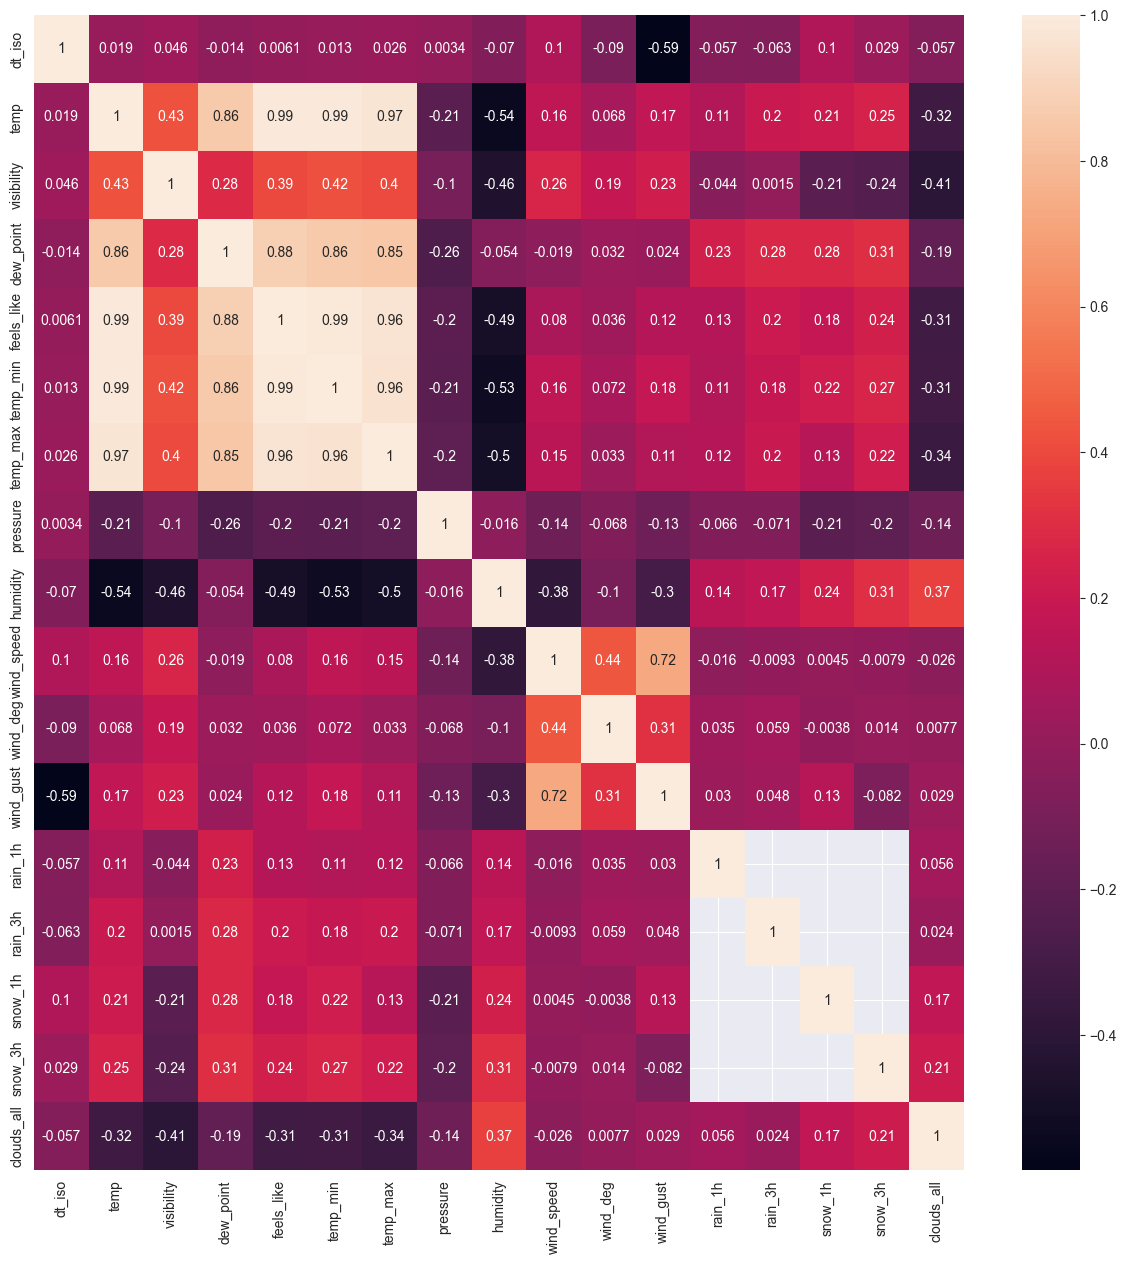

In [113]:
df_corr = cleaned_df[['dt_iso', 'temp', 'visibility', 'dew_point', 'feels_like', 'temp_min', 'temp_max', \
                      'pressure', 'humidity', 'wind_speed', 'wind_deg', 'wind_gust',\
                      'rain_1h', 'rain_3h', 'snow_1h', 'snow_3h', 'clouds_all'\
                      ]].corr()
plt.figure(figsize = (15,15))
sns.heatmap(df_corr, annot = True)